In [2]:
#pip install scikit-learn
#pip install seaborn
#pip install matplotlib
#pip install scikit-learn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.feature_selection import * 
from sklearn.ensemble import *
from sklearn.linear_model import *


In [ ]:
# Connect to the database
conn = sqlite3.connect('database.sqlite')
country_df = pd.read_sql_query("SELECT * FROM Country", conn)
player_df = pd.read_sql_query("SELECT * FROM Player", conn)
player_attributes_df = pd.read_sql_query("SELECT * FROM Player_Attributes", conn)
match_df = pd.read_sql_query("SELECT * FROM Match", conn)
team_df = pd.read_sql_query("SELECT * FROM Team", conn)
team_attributes_df = pd.read_sql_query("SELECT * FROM Team_Attributes", conn)
league_df = pd.read_sql_query("SELECT * FROM League", conn)

In [ ]:
# 4. Missing Values and Duplicates Analysis
def analyze_missing_values():
    print("\n=== Missing Values Analysis ===")
    for df, name in [(player_df, 'Player'), 
                     (player_attributes_df, 'player_attributes'), 
                     (match_df, 'Match'), 
                     (team_df, 'Team'), 
                     (team_attributes_df, 'Team_Attributes'),
                     (league_df, 'League')]:
        print(f"Processing {name} table...")
        missing = df.isnull().sum()
        missing_percent = (missing / len(df)) * 100
        print(f"\n{name} Table Missing Values:")
        
        # Print missing values or a message saying none if no missing values
        if missing.sum() > 0:
            for col, miss in missing[missing > 0].items():
                print(f"{col}: {miss} values ({missing_percent[col]:.2f}%)")
        else:
            print("No missing values.")
        
        # Check duplicates
        duplicates = df.duplicated().sum()
        print(f"{name} Table Duplicates: {duplicates}")


analyze_missing_values()


=== Missing Values Analysis ===
Processing Player table...

Player Table Missing Values:
No missing values.
Player Table Duplicates: 0
Processing player_attributes table...

player_attributes Table Missing Values:
overall_rating: 836 values (0.45%)
potential: 836 values (0.45%)
preferred_foot: 836 values (0.45%)
attacking_work_rate: 3230 values (1.76%)
defensive_work_rate: 836 values (0.45%)
crossing: 836 values (0.45%)
finishing: 836 values (0.45%)
heading_accuracy: 836 values (0.45%)
short_passing: 836 values (0.45%)
volleys: 2713 values (1.47%)
dribbling: 836 values (0.45%)
curve: 2713 values (1.47%)
free_kick_accuracy: 836 values (0.45%)
long_passing: 836 values (0.45%)
ball_control: 836 values (0.45%)
acceleration: 836 values (0.45%)
sprint_speed: 836 values (0.45%)
agility: 2713 values (1.47%)
reactions: 836 values (0.45%)
balance: 2713 values (1.47%)
shot_power: 836 values (0.45%)
jumping: 2713 values (1.47%)
stamina: 836 values (0.45%)
strength: 836 values (0.45%)
long_shots: 

In [ ]:
# 5. Statistical Summary
import numpy as np
import pandas as pd
from datetime import datetime

def generate_statistical_summary():
    print("\n=== Statistical Summary ===")
    
    # List of DataFrames and their respective table names
    tables = [
        (player_df, 'Player'), 
        (player_attributes_df, 'Player_Attributes'),
        (match_df, 'Match'),
        (team_df, 'Team'),
        (team_attributes_df, 'Team_Attributes'),
        (league_df, 'League')
    ]
    
    # Loop through each table and calculate the statistical summary for numerical columns
    for df, name in tables:
        print(f"\n{name} Table Statistical Summary:")
        # Select numerical columns
        numerical_cols = df.select_dtypes(include=[np.number]).columns
        
        if len(numerical_cols) > 0:
            # Calculate summary statistics
            stats = df[numerical_cols].describe()
            print(stats)
            
            # Calculate and print the median
            median = df[numerical_cols].median()
            print("\nMedian values:")
            print(median)
        else:
            print("No numerical columns found in this table.")
        
        # If 'birthday' column exists, calculate average age
        if 'birthday' in df.columns:
            # Ensure 'birthday' is in datetime format
            df['birthday'] = pd.to_datetime(df['birthday'], errors='coerce')
            
            # Calculate the age of each player
            current_date = datetime.now()
            df['age'] = df['birthday'].apply(lambda x: current_date.year - x.year if pd.notnull(x) else np.nan)
            
            # Drop NaN values in 'age' column for the calculations
            valid_ages = df['age'].dropna()
            
            # Calculate the average age
            avg_age = valid_ages.mean()
            
            # Calculate the range of ages (max - min)
            age_range = valid_ages.max() - valid_ages.min()
            
            # Calculate the most common (mode) age
            most_common_age = valid_ages.mode().iloc[0] if not valid_ages.mode().empty else np.nan
            
            print(f"\nAverage age of players: {avg_age:.2f}")
            print(f"Most common age in: {most_common_age}")


# Call the function to generate the statistical summary
generate_statistical_summary()



=== Statistical Summary ===

Player Table Statistical Summary:
                 id  player_api_id  player_fifa_api_id        height  \
count  11060.000000   11060.000000        11060.000000  11060.000000   
mean    5537.511392  156582.427215       165664.910488    181.867445   
std     3197.692647  160713.700624        58649.928360      6.369201   
min        1.000000    2625.000000            2.000000    157.480000   
25%     2767.750000   35555.500000       151889.500000    177.800000   
50%     5536.500000   96619.500000       184671.000000    182.880000   
75%     8306.250000  212470.500000       203883.250000    185.420000   
max    11075.000000  750584.000000       234141.000000    208.280000   

             weight  
count  11060.000000  
mean     168.380289  
std       14.990217  
min      117.000000  
25%      159.000000  
50%      168.000000  
75%      179.000000  
max      243.000000  

Median values:
id                      5536.50
player_api_id          96619.50
player_fi

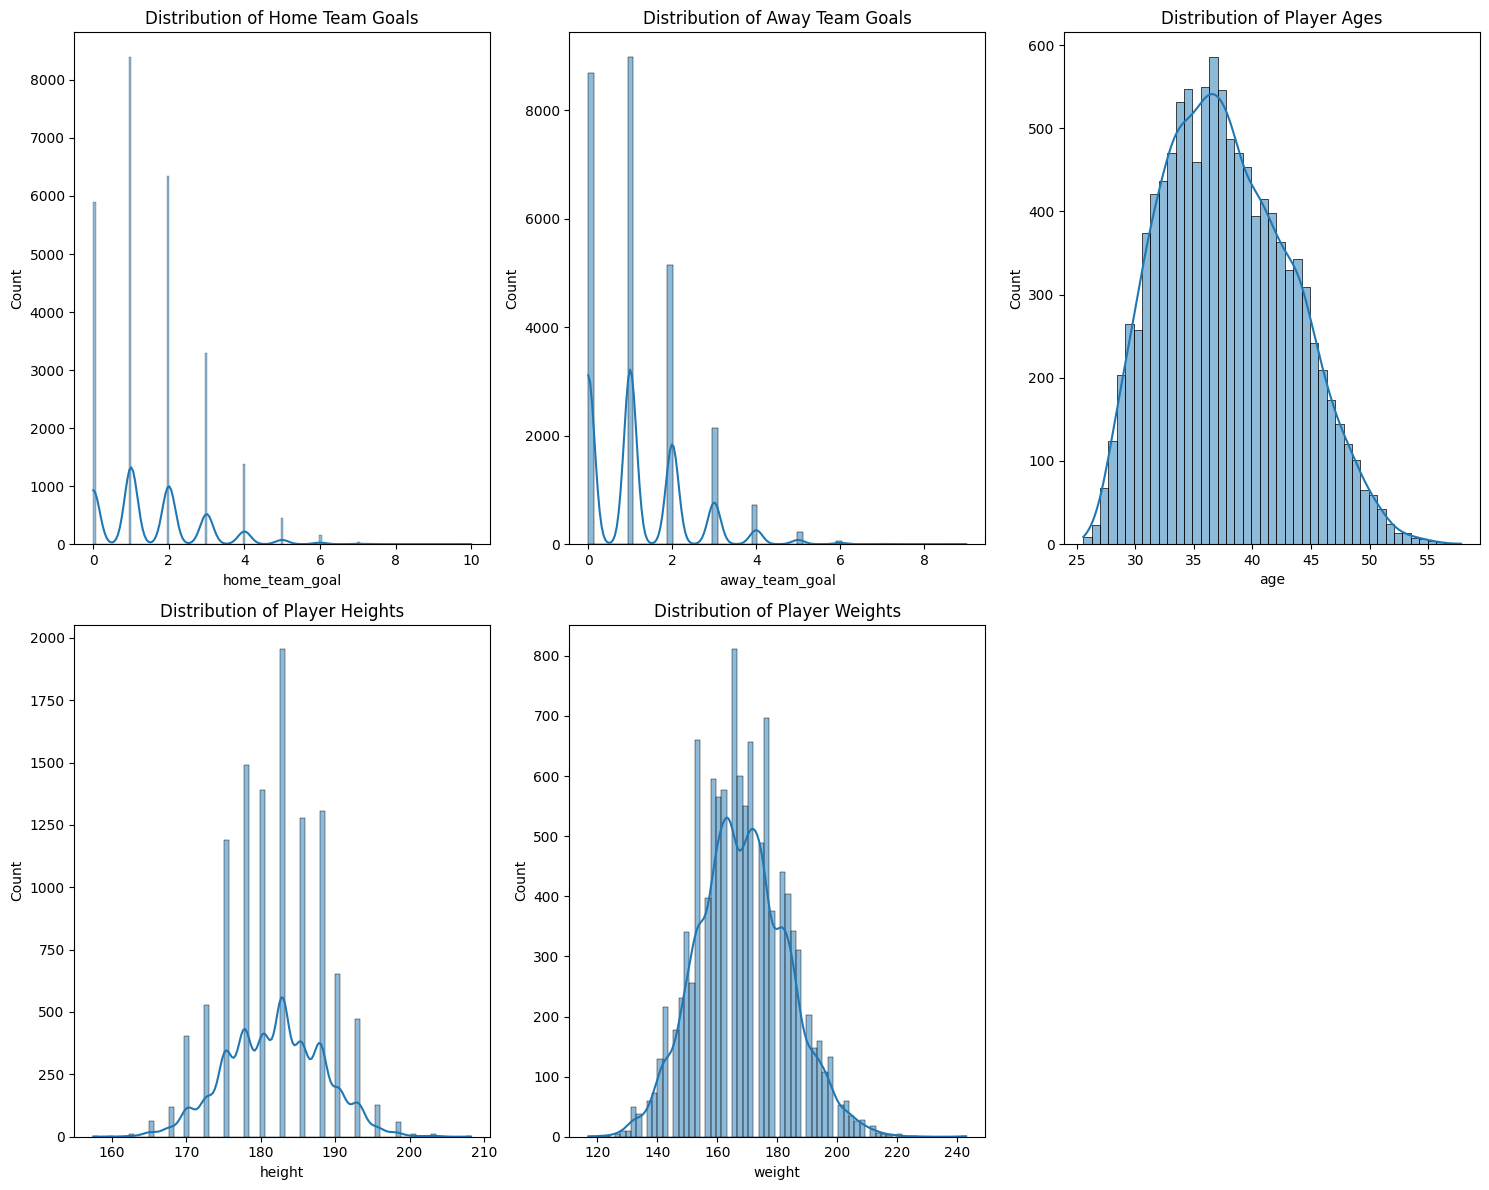

In [ ]:
# 6. Data Distribution Analysis
def plot_distributions():
    plt.figure(figsize=(15, 12))
    
    # Plot home team goals distribution
    plt.subplot(2, 3, 1)
    sns.histplot(match_df['home_team_goal'], kde=True)
    plt.title('Distribution of Home Team Goals')
    
    # Plot away team goals distribution
    plt.subplot(2, 3, 2)
    sns.histplot(match_df['away_team_goal'], kde=True)
    plt.title('Distribution of Away Team Goals')
    
    # Plot player attributes distribution (age)
    plt.subplot(2, 3, 3)
    player_df['birthday'] = pd.to_datetime(player_df['birthday'], errors='coerce')  # Handle errors if birthdate is invalid
    player_df['age'] = (pd.to_datetime('today') - player_df['birthday']).dt.days / 365.25
    sns.histplot(player_df['age'], kde=True)
    plt.title('Distribution of Player Ages')
    
    # Plot player height distribution
    plt.subplot(2, 3, 4)
    sns.histplot(player_df['height'], kde=True)
    plt.title('Distribution of Player Heights')
    
    # Plot player weight distribution
    plt.subplot(2, 3, 5)
    sns.histplot(player_df['weight'], kde=True)
    plt.title('Distribution of Player Weights')
    
    # plt.subplot(2, 3, 6)
    # sns.histplot(match_df['home_team_win'], kde=True)
    # plt.title('Distribution of Home Team Win')

    # plt.subplot(2, 3, 6)
    # sns.histplot(match_df['away_team_win'], kde=True)
    # plt.title('Distribution of Away Team Win')
    
    plt.tight_layout()
    plt.show()


plot_distributions()


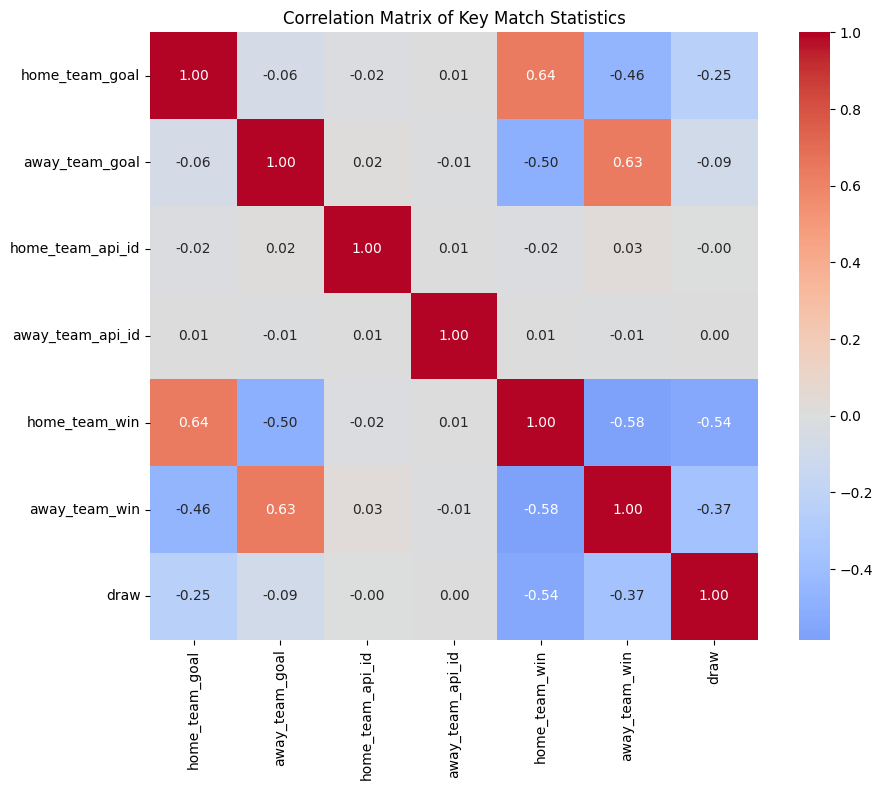


Key correlations:

Correlations with home_team_goal:
home_team_win       0.638360
away_team_api_id    0.006876
home_team_api_id   -0.015857
away_team_goal     -0.064099
draw               -0.248053
Name: home_team_goal, dtype: float64

Correlations with away_team_goal:
away_team_win       0.633677
home_team_api_id    0.015788
away_team_api_id   -0.014184
home_team_goal     -0.064099
draw               -0.085765
Name: away_team_goal, dtype: float64

Correlations with home_team_api_id:
away_team_win       0.025204
away_team_goal      0.015788
away_team_api_id    0.005653
draw               -0.002172
home_team_goal     -0.015857
Name: home_team_api_id, dtype: float64

Correlations with away_team_api_id:
home_team_win       0.009413
home_team_goal      0.006876
home_team_api_id    0.005653
draw                0.003785
away_team_win      -0.014005
Name: away_team_api_id, dtype: float64

Correlations with home_team_win:
home_team_goal      0.638360
away_team_api_id    0.009413
home_team_api

In [ ]:
# 7. Correlation Analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Merge Match and Player tables
merged_df = pd.merge(match_df, player_attributes_df, how='inner')


# Select features for correlation
numerical_features = [
    'home_team_goal',
    'away_team_goal',
    'home_team_win',
    'away_team_win',
    'draw',
    'overall_rating',
    'short_passing',
    'long_passing',
    'ball_control',
    'sprint_speed',
    'agility',
    'reactions',
    'shot_power',
    'stamina',
    'long_shots',
    'aggression',
    'interceptions',
    'positioning',
]

# Calculate correlation matrix
correlation_matrix = merged_df[numerical_features].corr()

# Shift and normalize the correlation matrix to range from 0 to 1
correlation_matrix_normalized = (correlation_matrix + 1) / 2

# Create heatmap for the normalized correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_normalized, 
            annot=True,      # Show correlation values
            cmap='coolwarm', # Red-blue color scheme
            center=0.5,      # Center the colormap at 0.5 for better visualization
            fmt='.2f',       # Show 2 decimal places
            square=True)     # Make cells square

plt.title('Correlation Matrix of Match vs Player Attributes')
plt.tight_layout()
plt.show()


# Print the strongest correlations
print("\nKey correlations:")
for col in numerical_features:
    print(f"\nCorrelations with {col}:")
    correlations = correlation_matrix[col].sort_values(ascending=False)
    print(correlations[correlations != 1.0].head())  # Exclude self-correlation (1.0)

# Additional descriptive statistics
print("\nDescriptive Statistics:")
print(merged_df[numerical_features].describe())


In [ ]:
#8. Outlier Detection

import matplotlib.pyplot as plt
import seaborn as sns


def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers based on the bounds
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Check outliers in goals and visualize with horizontal boxplots
for column in ['home_team_goal', 'away_team_goal']:
    outliers, lower, upper = detect_outliers(match_df, column)
    
    print(f"\nOutliers in {column}:")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Boundary values: Lower = {lower:.2f}, Upper = {upper:.2f}")
    print("Outlier values:")
    print(outliers[column].value_counts().head())

    # Plotting horizontal boxplot
    plt.figure(figsize=(8, 6))
    sns.histplot(data=match_df[column], color='lightblue')  # Set 'orient' to 'h' for horizontal
    plt.title(f'{column} - Boxplot')
    plt.xlabel(f'{column}')
    plt.show()




=== 8. Outlier Detection ===

Outliers in home_team_goal:
Number of outliers: 2056
Boundary values: Lower = -0.50, Upper = 3.50
Outlier values:
home_team_goal
4    1385
5     457
6     161
7      38
8       9
Name: count, dtype: int64

Outliers in away_team_goal:
Number of outliers: 79
Boundary values: Lower = -3.00, Upper = 5.00
Outlier values:
away_team_goal
6    63
7    10
8     5
9     1
Name: count, dtype: int64


In [10]:
# 9. Handling Missing Data
from sklearn.impute import SimpleImputer

# Step 1: Check for missing values before imputation
print("Missing values before imputation:")
print(player_attributes_df.isnull().sum())

# Step 2: Ensure categorical columns are treated as 'object'
categorical_columns = ['preferred_foot', 'attacking_work_rate', 'defensive_work_rate']
for col in categorical_columns:
    player_attributes_df[col] = player_attributes_df[col].astype('object')

# Replace empty strings with NaN for categorical columns
player_attributes_df.replace('', np.nan, inplace=True)

# Step 3: Handle missing values in numerical columns
numerical_columns = player_attributes_df.select_dtypes(include=['float64', 'int64']).columns
numerical_imputer = SimpleImputer(strategy='mean')  # Use mean for numerical imputation
player_attributes_df[numerical_columns] = numerical_imputer.fit_transform(player_attributes_df[numerical_columns])

# Step 4: Handle missing values in categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')  # Use mode for categorical imputation
player_attributes_df[categorical_columns] = categorical_imputer.fit_transform(player_attributes_df[categorical_columns])

# Step 5: Verify missing values after imputation
print("\nMissing values after imputation:")
print(player_attributes_df.isnull().sum())

# Step 6: Save the cleaned data back to the database
player_attributes_df.to_sql("Player_Attributes_Cleaned", conn, if_exists='replace', index=False)

print("\nCleaned data saved to 'Player_Attributes_Cleaned' table in the database.")


Missing values before imputation:
id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking       

In [11]:
# 10. Encoding Categorical Variables
# Step 1: One-Hot Encoding for `preferred_foot`
preferred_foot_encoded = pd.get_dummies(player_attributes_df['preferred_foot'], prefix='preferred_foot')
player_attributes_df = pd.concat([player_attributes_df, preferred_foot_encoded], axis=1)
player_attributes_df.drop('preferred_foot', axis=1, inplace=True)

# Step 2: Label Encoding for `attacking_work_rate` and `defensive_work_rate`
label_encoder = LabelEncoder()

for column in ['attacking_work_rate', 'defensive_work_rate']:
    player_attributes_df[column] = label_encoder.fit_transform(player_attributes_df[column])

# Step 3: Verify the encoding
print("First few rows after encoding:")
print(player_attributes_df.head())

# Step 4: Save the updated data back to the database
player_attributes_df.to_sql("Player_Attributes_Encoded", conn, if_exists='replace', index=False)

print("\nEncoded data saved to 'Player_Attributes_Encoded' table in the database.")


First few rows after encoding:
    id  player_fifa_api_id  player_api_id                 date  \
0  1.0            218353.0       505942.0  2016-02-18 00:00:00   
1  2.0            218353.0       505942.0  2015-11-19 00:00:00   
2  3.0            218353.0       505942.0  2015-09-21 00:00:00   
3  4.0            218353.0       505942.0  2015-03-20 00:00:00   
4  5.0            218353.0       505942.0  2007-02-22 00:00:00   

   overall_rating  potential  attacking_work_rate  defensive_work_rate  \
0            67.0       71.0                    4                   15   
1            67.0       71.0                    4                   15   
2            62.0       66.0                    4                   15   
3            61.0       65.0                    4                   15   
4            61.0       65.0                    4                   15   

   crossing  finishing  ...  marking  standing_tackle  sliding_tackle  \
0      49.0       44.0  ...     65.0             69.0 

In [12]:
# 11. Feature Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# Step 1: Apply Standardization (Z-score scaling)
scaler = StandardScaler()
player_attributes_df[numerical_columns] = scaler.fit_transform(player_attributes_df[numerical_columns])

# Alternatively, for Min-Max Scaling (if needed):
# min_max_scaler = MinMaxScaler()
# player_attributes_df[numerical_columns] = min_max_scaler.fit_transform(player_attributes_df[numerical_columns])

# Step 2: Verify scaling
print("First few rows after scaling:")
print(player_attributes_df[numerical_columns].head())

# Step 5: Save the scaled data back to the database
player_attributes_df.to_sql("Player_Attributes_Scaled", conn, if_exists='replace', index=False)

print("\nScaled data saved to 'Player_Attributes_Scaled' table in the database.")


First few rows after scaling:
         id  player_fifa_api_id  player_api_id  overall_rating  potential  \
0 -1.732041            0.978283       2.702463       -0.227757  -0.374070   
1 -1.732023            0.978283       2.702463       -0.227757  -0.374070   
2 -1.732004            0.978283       2.702463       -0.939490  -1.134265   
3 -1.731985            0.978283       2.702463       -1.081837  -1.286304   
4 -1.731966            0.978283       2.702463       -1.081837  -1.286304   

   crossing  finishing  heading_accuracy  short_passing   volleys  ...  \
0 -0.353830  -0.311712          0.834823      -0.100953 -0.301766  ...   
1 -0.353830  -0.311712          0.834823      -0.100953 -0.301766  ...   
2 -0.353830  -0.311712          0.834823      -0.100953 -0.301766  ...   
3 -0.411959  -0.364356          0.774038      -0.171566 -0.356949  ...   
4 -0.411959  -0.364356          0.774038      -0.171566 -0.356949  ...   

     vision  penalties   marking  standing_tackle  sliding_tac

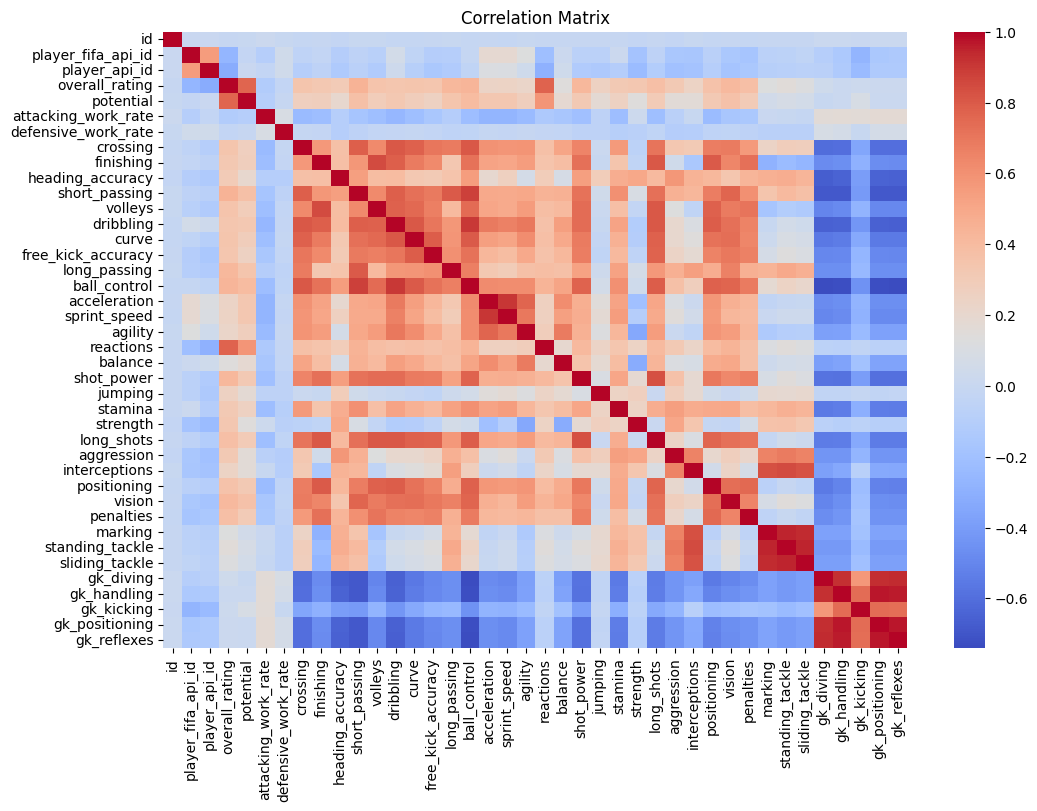

C:\Users\moaln\AppData\Local\Temp\ipykernel_25860\3929518762.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


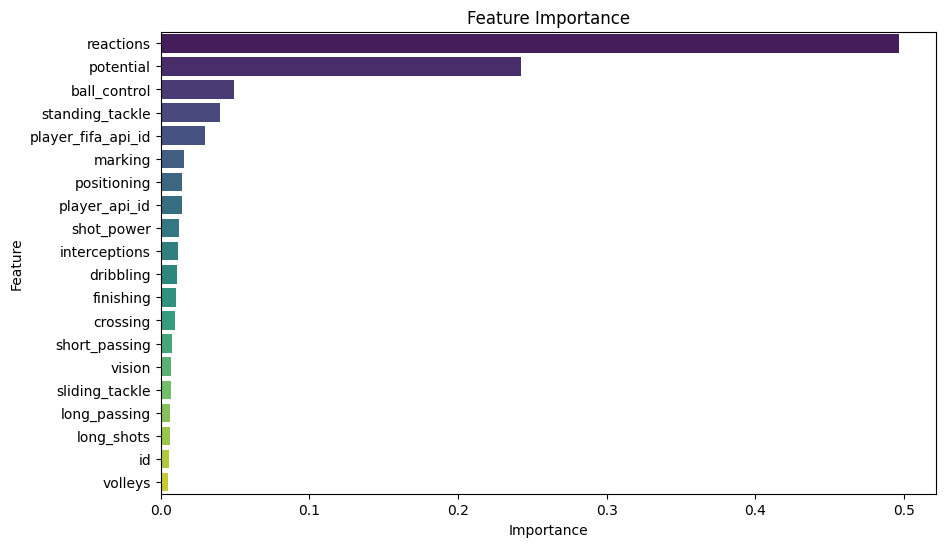


Selected features saved to 'Player_Attributes_Selected' table in the database.


In [13]:
# 12. Feature Selection
# Sample 10% of the data for faster testing
player_attributes_df_sample = player_attributes_df.sample(frac=0.1, random_state=42)

# Step 2: Correlation Analysis (Exclude Non-Numeric Columns)
numeric_data = player_attributes_df_sample.select_dtypes(include=[np.number])  # Select only numeric columns
correlation_matrix = numeric_data.corr()  # Compute correlation on numeric data only

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# Step 3: Feature Importance with Random Forest
X = player_attributes_df_sample.drop(columns=['overall_rating', 'date'])
y = player_attributes_df_sample['overall_rating']

# Perform feature selection (Select top 20 features based on mutual information)
selector = SelectKBest(mutual_info_regression, k=20)
X_selected = selector.fit_transform(X, y)

# Train a Random Forest Regressor model with parallel processing (use all cores)
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
rf.fit(X_selected, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns[selector.get_support()],
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importance")
plt.show()

# Select top features
selected_features = importance_df.head(10)['Feature'].tolist()
X_selected_final = X[selected_features]

# Save selected features back to the database
selected_features_df = player_attributes_df[selected_features + ['overall_rating']]
selected_features_df.to_sql("Player_Attributes_Selected", conn, if_exists='replace', index=False)

print("\nSelected features saved to 'Player_Attributes_Selected' table in the database.")


In [14]:
# 13. Algorithm Selection
# Step 1: Split Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=50, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=50, random_state=42)
}

# Step 3: Evaluate Models Using Cross-Validation
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')  # Using R^2 as the evaluation metric
    results[name] = {
        "Mean R^2": np.mean(scores),
        "Std Dev R^2": np.std(scores)
    }

# Display Results
for name, metrics in results.items():
    print(f"{name}: Mean R^2 = {metrics['Mean R^2']:.4f}, Std Dev R^2 = {metrics['Std Dev R^2']:.4f}")

# Step 4: Train the Best Model
best_model = RandomForestRegressor(n_estimators=50, random_state=42)  # Example: Random Forest chosen as best
best_model.fit(X_train, y_train)

# Save predictions
predictions = best_model.predict(X_test)
print("\nSample Predictions:")
print(predictions[:5])


Linear Regression: Mean R^2 = 0.8551, Std Dev R^2 = 0.0065
Random Forest Regressor: Mean R^2 = 0.9424, Std Dev R^2 = 0.0027
Gradient Boosting Regressor: Mean R^2 = 0.9094, Std Dev R^2 = 0.0021

Sample Predictions:
[ 1.48040284 -1.30105043  0.68041474  0.60924143 -1.71954954]


In [15]:
# 14. Data Splitting
# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the splits
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


Training set size: 14718
Testing set size: 3680


In [16]:
# 15. Model Training
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Train Models
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate performance
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Store results
    results[name] = {"R^2": r2, "MAE": mae, "RMSE": rmse}

# Display Results
for name, metrics in results.items():
    print(f"{name}: R^2 = {metrics['R^2']:.4f}, MAE = {metrics['MAE']:.4f}, RMSE = {metrics['RMSE']:.4f}")


Linear Regression: R^2 = 0.8612, MAE = 0.2868, RMSE = 0.3801
Random Forest Regressor: R^2 = 0.9454, MAE = 0.1584, RMSE = 0.2383
Gradient Boosting Regressor: R^2 = 0.9087, MAE = 0.2203, RMSE = 0.3083


In [17]:
# 16. . Model Evaluation
# Example: Evaluate a trained model (e.g., Gradient Boosting Regressor)
y_pred = best_model.predict(X_test)  # Replace with your trained model and test set

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Display results
print(f"R^2 Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


R^2 Score: 0.9454
Mean Absolute Error (MAE): 0.1584
Root Mean Squared Error (RMSE): 0.2383


In [18]:
#17. Performance Analysis 
# Predicting on the test set
y_pred = best_model.predict(X_test)

# Calculating performance metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Displaying the results
print(f"Performance Analysis on the Testing Set:")
print(f"R^2 Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Performance Analysis on the Testing Set:
R^2 Score: 0.9454
Mean Absolute Error (MAE): 0.1584
Root Mean Squared Error (RMSE): 0.2383


In [19]:
#18. Model Improvement 


# Step 1: A broader initial search on a sample
param_dist_initial = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5]
}

# Sample 40% of the training data for the initial search
X_train_sample = X_train.sample(frac=0.4, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

# First round of RandomizedSearchCV
initial_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(),
    param_distributions=param_dist_initial,
    n_iter=7,           # A bit more iterations for better search
    cv=3,               # 3-fold cross-validation
    n_jobs=-1,          # Utilize all CPU cores
    random_state=42,
    scoring='r2'
)

# Fit the initial RandomizedSearchCV on the sample
initial_search.fit(X_train_sample, y_train_sample)

# Step 2: Fine-tuning with the best parameters found from the initial search
best_params = initial_search.best_params_

# Adjust the search space based on initial results
param_dist_fine_tune = {
    'n_estimators': [best_params['n_estimators'] - 20, best_params['n_estimators'], best_params['n_estimators'] + 20],
    'max_depth': [best_params['max_depth'] - 5, best_params['max_depth'], best_params['max_depth'] + 5],
    'min_samples_split': [best_params['min_samples_split']]
}

# Second round of RandomizedSearchCV using the full training data
fine_tune_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(),
    param_distributions=param_dist_fine_tune,
    n_iter=5,            # Fewer iterations, more focused search
    cv=3,
    n_jobs=-1,
    random_state=42,
    scoring='r2'
)

# Fit the fine-tuning search on the full dataset
fine_tune_search.fit(X_train, y_train)

# Use the best model found from the fine-tuning
best_model = fine_tune_search.best_estimator_

# Evaluate the final model on the test set
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Display results
print("Performance Analysis on the Testing Set (After Fine-Tuning):")
print(f"Best Parameters: {fine_tune_search.best_params_}")
print(f"R^2 Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")




Performance Analysis on the Testing Set (After Fine-Tuning):
Best Parameters: {'n_estimators': 150, 'min_samples_split': 2, 'max_depth': 20}
R^2 Score: 0.9463
Mean Absolute Error (MAE): 0.1565
Root Mean Squared Error (RMSE): 0.2364


In [20]:
#19. Validation 

# Step 1: Train-Test Split
# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Cross-Validation
# Initialize model
model = RandomForestRegressor()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

# Print mean R^2 score from cross-validation
print(f"Cross-Validation R^2: {cv_scores.mean():.4f}")

# Step 3: Hyperparameter Tuning with Cross-Validation (GridSearchCV)

# Set parameter grid for tuning
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 15]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')

# Fit the grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Print best parameters and the corresponding score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best R^2 Score: {grid_search.best_score_:.4f}")

# Step 4: Model Evaluation on Test Set
best_model = grid_search.best_estimator_

# Predictions on test set
y_pred = best_model.predict(X_test)


# Calculate performance metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Display results
print(f"R^2 on Test Set: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Cross-Validation R^2: 0.9433
Best Parameters: {'max_depth': 15, 'n_estimators': 150}
Best R^2 Score: 0.9417
R^2 on Test Set: 0.9439
Mean Absolute Error (MAE): 0.1606
Root Mean Squared Error (RMSE): 0.2415


In [21]:
#20. Final Model Selection 

# Step 1: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Define models
rf_model = RandomForestRegressor(random_state=42)
lr_model = LinearRegression()

# Step 3: Hyperparameter tuning (if needed) for RandomForest
rf_param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 15]
}

# Initialize GridSearchCV for RandomForest
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, scoring='r2')
rf_grid_search.fit(X_train, y_train)

# Step 4: Cross-validation scores for RandomForest
cv_scores_rf = cross_val_score(rf_grid_search.best_estimator_, X_train, y_train, cv=5, scoring='r2')

# Step 5: Train and evaluate Linear Regression model
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)

# Calculate metrics for Linear Regression
lr_r2 = r2_score(y_test, lr_y_pred)
lr_mae = mean_absolute_error(y_test, lr_y_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_y_pred))

# Step 6: Train and evaluate Random Forest model
rf_y_pred = rf_grid_search.best_estimator_.predict(X_test)

# Calculate metrics for Random Forest
rf_r2 = r2_score(y_test, rf_y_pred)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))

# Step 7: Compare models based on performance metrics
print("Linear Regression Performance:")
print(f"R²: {lr_r2:.4f}")
print(f"MAE: {lr_mae:.4f}")
print(f"RMSE: {lr_rmse:.4f}")

print("\nRandom Forest Performance:")
print(f"R²: {rf_r2:.4f}")
print(f"MAE: {rf_mae:.4f}")
print(f"RMSE: {rf_rmse:.4f}")

# Step 8: Cross-Validation Results for Random Forest
print(f"\nRandom Forest Cross-Validation R²: {cv_scores_rf.mean():.4f}")

# Step 9: Select final model based on performance
if rf_r2 > lr_r2:
    print("\nFinal Model: Random Forest Regressor")
    final_model = rf_grid_search.best_estimator_
else:
    print("\nFinal Model: Linear Regression")
    final_model = lr_model

# Evaluate the final selected model on test data
final_y_pred = final_model.predict(X_test)
final_r2 = r2_score(y_test, final_y_pred)
final_mae = mean_absolute_error(y_test, final_y_pred)
final_rmse = np.sqrt(mean_squared_error(y_test, final_y_pred))

# Display final model performance
print("\nFinal Model Performance on Test Set:")
print(f"R²: {final_r2:.4f}")
print(f"MAE: {final_mae:.4f}")
print(f"RMSE: {final_rmse:.4f}")

Linear Regression Performance:
R²: 0.8612
MAE: 0.2868
RMSE: 0.3801

Random Forest Performance:
R²: 0.9445
MAE: 0.1607
RMSE: 0.2402

Random Forest Cross-Validation R²: 0.9419

Final Model: Random Forest Regressor

Final Model Performance on Test Set:
R²: 0.9445
MAE: 0.1607
RMSE: 0.2402


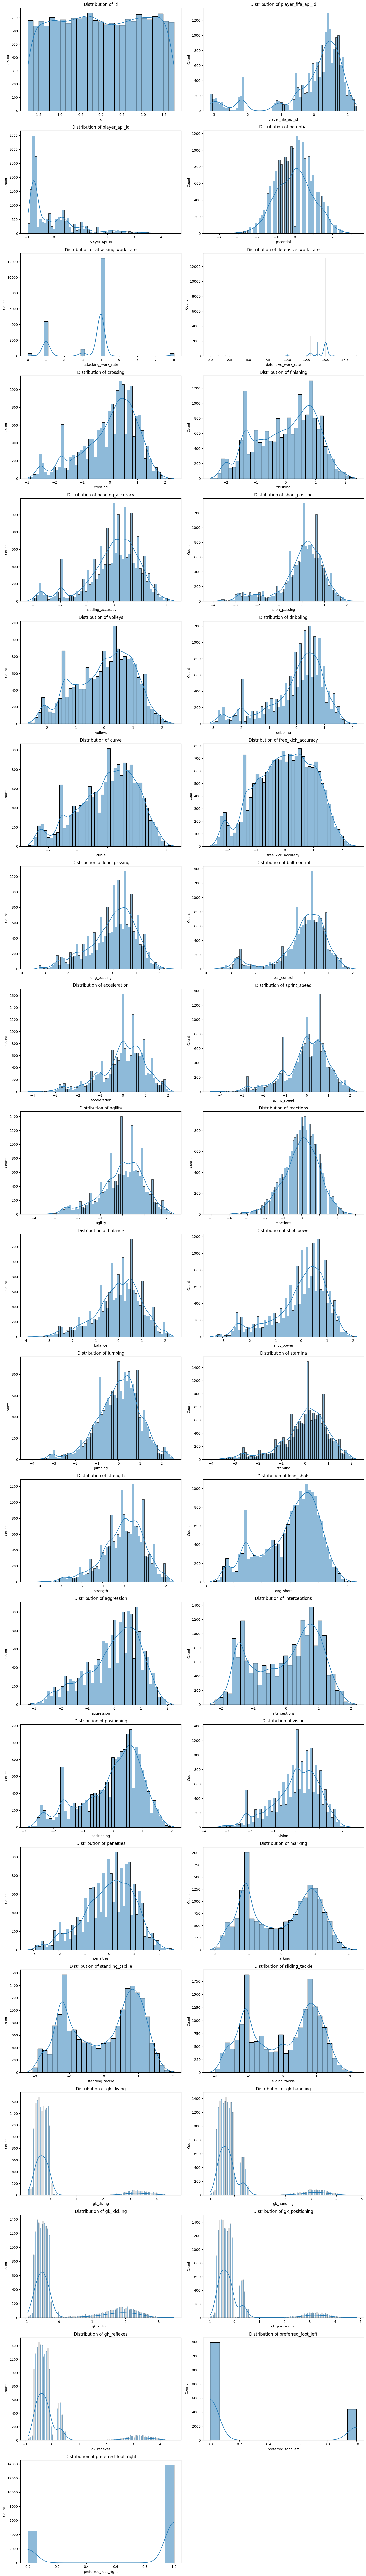

In [27]:
#21. Data Distribution 
# Number of features
num_features = len(X.columns)

# Number of columns per row
cols_per_row = 2

# Calculate rows needed
num_rows = math.ceil(num_features / cols_per_row)

# Create the figure for histograms with increased size
plt.figure(figsize=(15, num_rows * 5))

# Loop through features and plot in batches
for i, feature in enumerate(X.columns, 1):
    plt.subplot(num_rows, cols_per_row, i)  # Adjust number of rows and columns
    sns.histplot(X[feature], kde=True)  # Add KDE curve
    plt.title(f'Distribution of {feature}')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plots
plt.show()

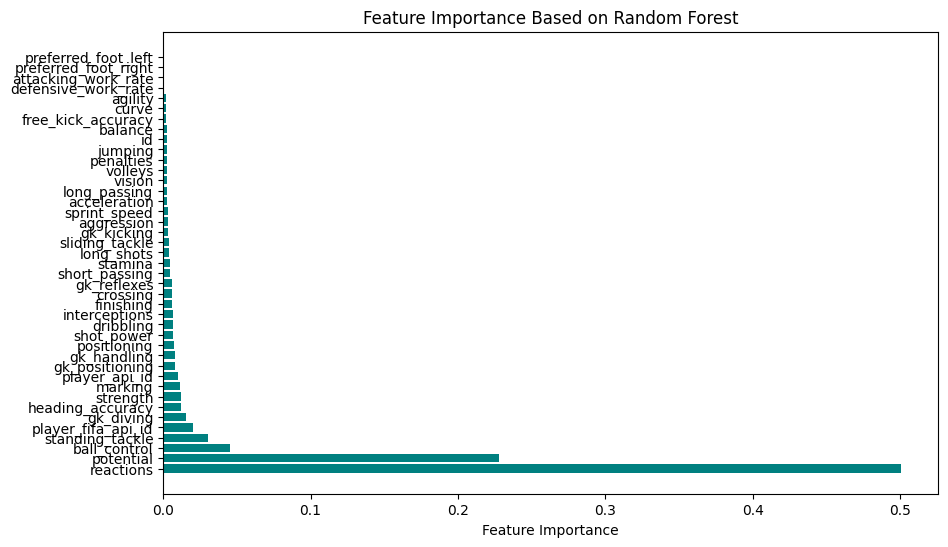

                 Feature  Importance
19             reactions    0.500856
3              potential    0.227979
15          ball_control    0.045074
32       standing_tackle    0.030472
1     player_fifa_api_id    0.020324
34             gk_diving    0.015278
8       heading_accuracy    0.012178
24              strength    0.011733
31               marking    0.011339
2          player_api_id    0.009718
37        gk_positioning    0.008083
35           gk_handling    0.008006
28           positioning    0.007442
21            shot_power    0.006849
11             dribbling    0.006756
27         interceptions    0.006465
7              finishing    0.006083
6               crossing    0.006033
38           gk_reflexes    0.005669
9          short_passing    0.004756
23               stamina    0.004302
25            long_shots    0.004024
33        sliding_tackle    0.003687
36            gk_kicking    0.003566
26            aggression    0.003173
17          sprint_speed    0.002956
1

In [23]:
#22. Feature Importance 

# Train a RandomForest model (ensure it is already trained or fit on your data)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance
feature_importance = rf_model.feature_importances_

# Create a DataFrame to pair feature names with their importance scores
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='teal')
plt.xlabel('Feature Importance')
plt.title('Feature Importance Based on Random Forest')
plt.show()

# Display the sorted feature importances
print(importance_df)


In [24]:
#23. What are the most important features in your model? 

# Define a function to evaluate model performance with a subset of features
def evaluate_model_with_subset(X_train, y_train, X_test, y_test, selected_features):
    X_train_subset = X_train[selected_features]
    X_test_subset = X_test[selected_features]
    
    # Fit the model with the subset of features
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_subset, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_subset)
    
    # Evaluate performance
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    return r2, mae, rmse

# Define feature subsets based on the actual attributes shown in the distributions
feature_subsets = [
    # Technical Skills
    ['dribbling', 'ball_control', 'short_passing', 'long_passing', 'crossing'],
    
    # Physical Attributes
    ['sprint_speed', 'acceleration', 'stamina', 'strength', 'balance', 'agility'],
    
    # Attacking Skills
    ['finishing', 'shot_power', 'long_shots', 'curve', 'attacking_work_rate'],
    
    # Defensive Skills
    ['defensive_work_rate', 'standing_tackle', 'sliding_tackle', 'interceptions'],
    
    # Goalkeeper Skills
    ['gk_handling', 'gk_positioning', 'gk_reflexes', 'gk_diving']
]

for subset in feature_subsets:
    r2, mae, rmse = evaluate_model_with_subset(X_train, y_train, X_test, y_test, subset)
    print(f"Performance with features {subset}:")
    print(f"R² Score: {r2:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}")
    print("-" * 40)


Performance with features ['dribbling', 'ball_control', 'short_passing', 'long_passing', 'crossing']:
R² Score: 0.6482, MAE: 0.4223, RMSE: 0.6050
----------------------------------------
Performance with features ['sprint_speed', 'acceleration', 'stamina', 'strength', 'balance', 'agility']:
R² Score: 0.5264, MAE: 0.5212, RMSE: 0.7020
----------------------------------------
Performance with features ['finishing', 'shot_power', 'long_shots', 'curve', 'attacking_work_rate']:
R² Score: 0.5123, MAE: 0.5018, RMSE: 0.7124
----------------------------------------
Performance with features ['defensive_work_rate', 'standing_tackle', 'sliding_tackle', 'interceptions']:
R² Score: 0.4139, MAE: 0.5457, RMSE: 0.7810
----------------------------------------
Performance with features ['gk_handling', 'gk_positioning', 'gk_reflexes', 'gk_diving']:
R² Score: 0.2903, MAE: 0.6062, RMSE: 0.8594
----------------------------------------
